# Explanatory Data Analysis / Data Preprocessing

## Penggunaan pandas untuk melakukan EDA

Pertama sekali dimulai dengan mengimpor data dari berkas CSV menggunakan pustaka pandas dan melihat waktu eksekusinya.

In [1]:
import pandas as pd
%time data = pd.read_csv("./train.csv", delimiter=',', index_col=0)

Wall time: 373 ms


Menampilkan beberapa sampel data dengan perintah berikut.

In [2]:
data.sample(5)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
patient_id,,,,,,,
136229,Relpax,Migraine,"""This is the only medicine on the market that ...",10,31-Dec-08,10,8.574486
195227,Hydrocodone / ibuprofen,Pain,"""Vicoprofen was prescribed to me after a Lapar...",10,26-Nov-10,8,7.737593
16542,Ethinyl estradiol / norethindrone,Birth Control,"""Took minastrin for about a year and a half an...",2,11-Dec-15,0,5.361012
49545,Ethinyl estradiol / levonorgestrel,Birth Control,"""After being off BC for 8 years I finally had ...",10,21-Sep-15,14,7.369878
161555,Diphenhydramine,Insomnia,"""I used the Equate Night Time Sleep Aid. It d...",8,17-Jun-09,2,7.171575


Menampilkan statistik deskriptif dengan perintah berikut.

In [3]:
data.describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


Dari hasil tersebut dapat disimpulkan bahwa tidak ditemukan noise pada effectiveness_rating dan base_score 

Kemudian memeriksa nilai yang hilang. Kami hanya akan mencetak 10 fitur secara berurut dengan lebih dari 10% nilai yang hilang.

In [4]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent']>10][:10]

,Total,Missing Percent


Ditemukan bahwa pada dataset yang kami gunakan tidak terdapat missing value.

Selanjutnya digunakan pandas-profiling untuk dapat menampilkan informasi secara dinamis dan mudah.
Pandas-profiling menyatukan semua elemen-elemen yang tersedia untuk membentuk EDA yang lengkap: nilai yang paling sering muncul, nilai yang hilang, korelasi, statistik kuantitatif dan deskriptif, panjang data dan banyak lagi. Berkat metrik ini, Anda akan dengan cepat melihat distribusi dan disparitas data Anda. Informasi ini penting untuk mengetahui apakah data dapat diolah di proses yang selanjutnya atau tidak.

In [10]:
import pandas_profiling

profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="drugs_pandas_profiling.html")

Berkas drugs_pandas_profiling.html menyajikan bagian “ikhtisar” dari laporan. Bagian ini secara
singkat menyajikan informasi tentang jenis variabel, nilai yang hilang, atau ukuran data set.

Selanjutnya akan dilakukan pengecekan data yang duplicated

In [26]:
duplicated_data = data[data.duplicated()]
print("Jumlah duplicated data :",len(duplicated_data))

Jumlah duplicated data : 0


Selanjutnya data yang memiliki rating dibawah 5 dibuang

In [37]:
data_reduction = data[data.effectiveness_rating >= 5]
display(data_reduction)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
patient_id,,,,,,,
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792
...,...,...,...,...,...,...,...
90582,Docosanol,Herpes Simplex,"""It really works!! Ive got cold sores twice be...",10,17-May-15,22,8.757201
183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076


# Penggunaan Seaborn untuk melakukan EDA

Menyertakan beberapa pustaka pendukung seperti numpy dan matplotlib terlebih dahulu.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

impor pustaka seaborn

In [39]:
import seaborn as sns

Untuk melakukan EDA, mari menggunakan data set yang digunakan

In [40]:
data_reduction.shape

(24169, 7)

In [41]:
data_reduction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24169 entries, 206461 to 45410
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name_of_drug                24169 non-null  object 
 1   use_case_for_drug           24169 non-null  object 
 2   review_by_patient           24169 non-null  object 
 3   effectiveness_rating        24169 non-null  int64  
 4   drug_approved_by_UIC        24169 non-null  object 
 5   number_of_times_prescribed  24169 non-null  int64  
 6   base_score                  24169 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB


Menganalisis Variabel Secara Individual

In [42]:
numerical_vars = ['effectiveness_rating', 'drug_approved_by_UIC', 'number_of_times_prescribed', 'base_score']
categorical_vars = ['name_of_drug', 'use_case_for_drug', 'review_by_patient']

In [43]:
drugs = data_reduction[numerical_vars+categorical_vars]

In [44]:
drugs.shape

(24169, 7)

Memahami Variabel Utama

In [45]:
drugs['use_case_for_drug'].describe()

count             24169
unique              599
top       Birth Control
freq               3746
Name: use_case_for_drug, dtype: object

Variabel Numerikal

In [46]:
drugs[numerical_vars].describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,24169.000000,24169.000000,24169.000000
mean,8.694278,31.979974,6.829511
std,1.522261,38.851090,1.541507
min,5.000000,0.000000,0.899076
25%,8.000000,8.000000,6.173134
50%,9.000000,20.000000,6.952928
75%,10.000000,42.000000,8.022969
max,10.000000,771.000000,8.853339


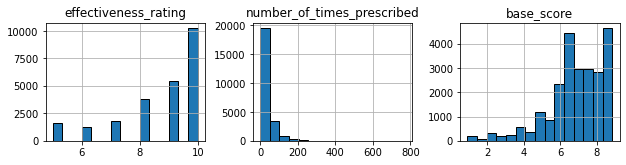

In [47]:
drugs[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

Variabel Kategorikal

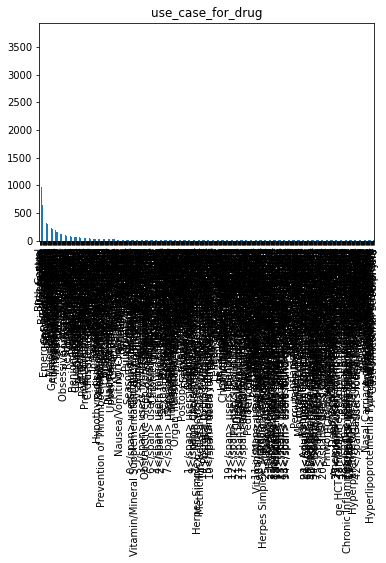

In [48]:
drugs['use_case_for_drug'].value_counts().plot(kind='bar', title='use_case_for_drug');